In [1]:
import pandas as pd
import cptac
import cptac.utils as ut
import lifelines
from lifelines import KaplanMeierFitter
from lifelines import CoxPHFitter

In [2]:
#enter cancer file below
cancer_file = 'colon_has_event.csv'
cancer_df = pd.read_csv(cancer_file)
cancer_df.head()

,Patient_ID,gain_event,loss_event
0,01OV007,0,1
1,01OV017,0,1
2,01OV018,0,1
3,01OV023,1,0
4,01OV026,1,0


In [3]:
if cancer_file == 'ovarian_has_event.csv':
    cancer_set = cptac.Ovarian()
elif cancer_file == 'colon_has_event.csv':
    cancer_set = cptac.Colon()
elif cancer_file == 'brca_has_event.csv':
    cancer_set = cptac.Brca()
elif cancer_file == 'hnscc_has_event.csv':
    cancer_set = cptac.Hnscc()
elif cancer_file == 'lscc_has_event.csv':
    cancer_set = cptac.Lscc()

#fix for laud
else:
    cancer_set = cptac.Laud()
    
    
clinical = cancer_set.get_clinical()
cancer_follow_up = cancer_set.get_followup()
cancer_follow_up = cancer_follow_up.rename({'PPID' : 'Patient_ID'}, axis='columns')
cancer_clin_event_follow = pd.merge(clinical, cancer_follow_up, on = "Patient_ID")
cancer_clin_event_follow.head()

Name,Sample_Tumor_Normal,Participant_Procurement_Age,Participant_Gender,Participant_Race,Participant_Ethnicity,Participant_Jewish_Heritage,Participant_History_Malignancy,Participant_History_Chemotherapy,Participant_History_Neo-adjuvant_Treatment,Participant_History_Radiation_Therapy,...,Number of Days from Date of Initial Pathologic Diagnosis of the Tumor Submitted to CPTAC to Date Radiation Therapy Started for this Other Malignancy,Was the patient staged using FIGO?,FIGO Staging System (Gynecologic Tumors Only),FIGO Stage,Was the patient staged using AJCC?,AJCC Cancer Staging Edition,Pathologic Spread: Primary Tumor (pT),Pathologic Spread: Lymph Nodes (pN),Distant Metastases (M),AJCC Tumor Stage
Patient_ID,,,,,,,,,,,,,,,,,,,,,
01OV002,Tumor,540.0,Female,White,Not Hispanic or Latino,Not Jewish,No,No,No,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01OV002,Tumor,540.0,Female,White,Not Hispanic or Latino,Not Jewish,No,No,No,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01OV002,Tumor,540.0,Female,White,Not Hispanic or Latino,Not Jewish,No,No,No,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01OV002,Tumor,540.0,Female,White,Not Hispanic or Latino,Not Jewish,No,No,No,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01OV007,Tumor,820.0,Female,White,Not Hispanic or Latino,Unknown,No,No,No,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
cancer_clin_event_follow = pd.merge(cancer_df, cancer_clin_event_follow, on = "Patient_ID")
cancer_clin_event_follow.head()

,Patient_ID,gain_event,loss_event,Sample_Tumor_Normal,Participant_Procurement_Age,Participant_Gender,Participant_Race,Participant_Ethnicity,Participant_Jewish_Heritage,Participant_History_Malignancy,...,Number of Days from Date of Initial Pathologic Diagnosis of the Tumor Submitted to CPTAC to Date Radiation Therapy Started for this Other Malignancy,Was the patient staged using FIGO?,FIGO Staging System (Gynecologic Tumors Only),FIGO Stage,Was the patient staged using AJCC?,AJCC Cancer Staging Edition,Pathologic Spread: Primary Tumor (pT),Pathologic Spread: Lymph Nodes (pN),Distant Metastases (M),AJCC Tumor Stage
0,01OV007,0,1,Tumor,820.0,Female,White,Not Hispanic or Latino,Unknown,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01OV007,0,1,Tumor,820.0,Female,White,Not Hispanic or Latino,Unknown,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,01OV007,0,1,Tumor,820.0,Female,White,Not Hispanic or Latino,Unknown,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,01OV017,0,1,Tumor,672.0,Female,White,Not Hispanic or Latino,Not Jewish,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01OV017,0,1,Tumor,672.0,Female,White,Not Hispanic or Latino,Not Jewish,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,Patient_ID,gain_event,loss_event,Sample_Tumor_Normal,Participant_Procurement_Age,Participant_Gender,Participant_Race,Participant_Ethnicity,Participant_Jewish_Heritage,Participant_History_Malignancy,...,Number of Days from Date of Initial Pathologic Diagnosis of the Tumor Submitted to CPTAC to Date Radiation Therapy Started for this Other Malignancy,Was the patient staged using FIGO?,FIGO Staging System (Gynecologic Tumors Only),FIGO Stage,Was the patient staged using AJCC?,AJCC Cancer Staging Edition,Pathologic Spread: Primary Tumor (pT),Pathologic Spread: Lymph Nodes (pN),Distant Metastases (M),AJCC Tumor Stage
0,01OV007,0,1,Tumor,820.0,Female,White,Not Hispanic or Latino,Unknown,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01OV007,0,1,Tumor,820.0,Female,White,Not Hispanic or Latino,Unknown,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,01OV007,0,1,Tumor,820.0,Female,White,Not Hispanic or Latino,Unknown,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,01OV017,0,1,Tumor,672.0,Female,White,Not Hispanic or Latino,Not Jewish,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01OV017,0,1,Tumor,672.0,Female,White,Not Hispanic or Latino,Not Jewish,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,26OV009,0,1,Tumor,728.0,Female,White,Unknown,Not Jewish,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
236,26OV009,0,1,Tumor,728.0,Female,White,Unknown,Not Jewish,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
237,26OV009,0,1,Tumor,728.0,Female,White,Unknown,Not Jewish,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
238,26OV011,0,0,Tumor,769.0,Female,White,Unknown,Not Jewish,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#function to use in the apply call
def simplify_status(row):
    if row['Date of Death'] != pd.NaT:
        return row['Date of Death']
    elif row['Date of Last Contact (Do not answer if patient is deceased)'] != pd.NaT:
        return row['Date of Last Contact (Do not answer if patient is deceased)']
    else:
        return pd.NaT


    
    
    
#avoid this step if it is the ovarian data    
if cancer_file == 'ovarian_has_event.csv':
    columns_to_focus_on = ['Vital_Status',
                       'Days_Between_Collection_And_Last_Contact', 
                       'Days_Between_Collection_And_Death', 'gain_event', 'loss_event']
else:
    #axis=1 means that we are working with rows. (axis=0 means columns)
    clinical_data['simple_status'] = clinical_data.apply(simplify_status, axis=1)
    
    columns_to_focus_on = ['simple_status', 'gain_event', 'loss_event']
    
    
    
focus_group = cancer_clin_event_follow[columns_to_focus_on].copy().drop_duplicates()

In [6]:
focus_group['Vital_Status'] = focus_group['Vital_Status'].replace('Living', False)
focus_group['Vital_Status'] = focus_group['Vital_Status'].replace('Deceased', True)
focus_group['Vital_Status'] = focus_group['Vital_Status'].astype('bool')
#make new column using apply function...

In [7]:
cols = ['Days_Between_Collection_And_Last_Contact', 'Days_Between_Collection_And_Death']

focus_group = focus_group.assign(Days_Until_Last_Contact_Or_Death=focus_group[cols].sum(1)).drop(cols, 1)

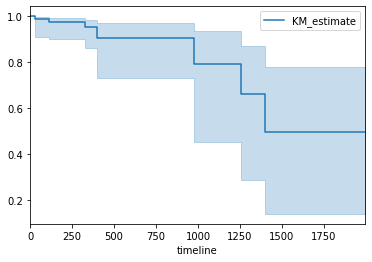

In [8]:
time = focus_group['Days_Until_Last_Contact_Or_Death']
status = focus_group['Vital_Status']

kmf = KaplanMeierFitter()
kmf.fit(time, event_observed = status)
kmf.plot()

In [9]:
cph = CoxPHFitter()
cph.fit(focus_group, duration_col = "Days_Until_Last_Contact_Or_Death", 
        event_col = "Vital_Status")
attributes = ['gain_event', 'loss_event']
focus_group

,Vital_Status,gain_event,loss_event,Days_Until_Last_Contact_Or_Death
0,False,0,1,368.0
3,False,0,1,395.0
8,False,0,1,390.0
16,False,1,0,375.0
20,True,1,0,112.0
...,...,...,...,...
227,False,1,0,330.0
228,True,0,0,399.0
234,False,0,1,726.0
238,False,0,0,176.0


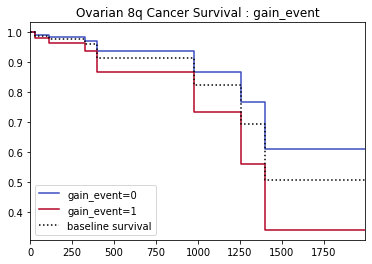

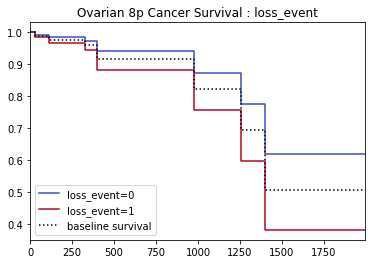

In [10]:
armvar = ['8q', '8p']
length = len(attributes)

for i in range(0, length):
    plot_title = "Ovarian " + armvar[i] + " Cancer Survival : " + attributes[i]
    cph.plot_covariate_groups(attributes[i], [0,1], cmap='coolwarm', 
                          title=plot_title)